# This is bird dataset builder
    ## Amit

In [ ]:
!pip install -Uqq fastbook duckduckgo_search

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/amitk777/ibird/main/ibird.csv")
for index,row in df.iterrows():
    print(row['SCIENTIFIC NAME'])
    print(index)

In [8]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastbook import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
#     return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return search_images_ddg(term,max_images)


In [9]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'http://s1.picswalls.com/wallpapers/2014/07/18/birds-background_104544942_54.jpg'

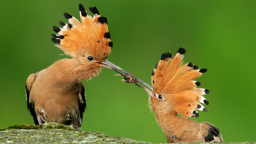

In [10]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [25]:
!rm -r ./ibird/acrocercus/

In [26]:
dpath = Path('ibird')
from time import sleep
dpath.mkdir(exist_ok=True, parents=True)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/amitk777/ibird/main/ibird.csv")

for index,row in df.iterrows():
    # print(row['SCIENTIFIC NAME'])

    dest = Path('./ibird/'+'/'+row['SCIENTIFIC NAME'])

    if(row[0].startswith('A') or row[0].startswith('B') or row[0].startswith('C') or row[0].startswith('D') or row[0].startswith('E') or row[0].startswith('F')):
         print(row[0]+' Not downloaded')
        #  pass

    else :
         download_images(dest, urls=search_images(f'{row[0]}',30))
         sleep(5)

    # sleep(10)


Abroscopus albogularis Not downloaded
Abroscopus schisticeps Not downloaded
Abroscopus superciliaris Not downloaded
Accipiter badius Not downloaded
Accipiter butleri Not downloaded
Accipiter gentilis Not downloaded
Accipiter gularis Not downloaded
Accipiter nisus Not downloaded
Accipiter soloensis Not downloaded
Accipiter trivirgatus Not downloaded
Accipiter virgatus Not downloaded
Aceros nipalensis Not downloaded
Acridotheres fuscus Not downloaded
Acridotheres ginginianus Not downloaded
Acridotheres grandis Not downloaded
Acridotheres tristis Not downloaded
Acrocephalus agricola Not downloaded
Acrocephalus arundinaceus Not downloaded
Acrocephalus bistrigiceps Not downloaded
Acrocephalus concinens Not downloaded
Acrocephalus dumetorum Not downloaded
Acrocephalus melanopogon Not downloaded
Acrocephalus orientalis Not downloaded
Acrocephalus stentoreus Not downloaded
Actinodura cyanouroptera Not downloaded
Actinodura egertoni Not downloaded
Actinodura nipalensis Not downloaded
Actinodura

# New Section

In [36]:
import os

!tar -czf birds.tar.gz ibird

from IPython.display import FileLink



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
FileLink(r'birds.tar.gz')

/content/birds.tar.gz

In [44]:
!cp birds.tar.gz ./drive/MyDrive/
